<a href="https://colab.research.google.com/github/yoobyoungcheol/-IT-Python-/blob/master/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# LSTM 과 GRU셀 : 순환 신경망에서 빼 놓을 수 없는 핵심 기술

# 전에 배웠던 SimpleRNN 보다 훨씬 복잡하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택 됨
# 일반적으로 기본 순환층은 긴 시퀸스를 학습하기 어렵다
# 시퀸스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석 됨
# 멀리 떨어져 있는 단어 정보를 인식하는데 어려울수 있음 그래서 LSTM과 GRU를 사용한다.

# LSTM(Long Short-Term Memory)는 말 그대로 단기 기억을 오래 기억하기 위해서 고안됨
# 기본 개념은 동일 함(입력과 가중치를 곱하고 절편을 더해 활성함수를 통과시키는 구조를 여러개 가짐)
# 이런 계산 결과는 다음 타임스텝에 재사용됨

# 1. 은닉상태 만듬 : 입력과 이전 타임스템의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은식 상태를 만듬
# 이때 기본 순환층과는 달리 스그모이드 활성화 함수를 사용함, 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬

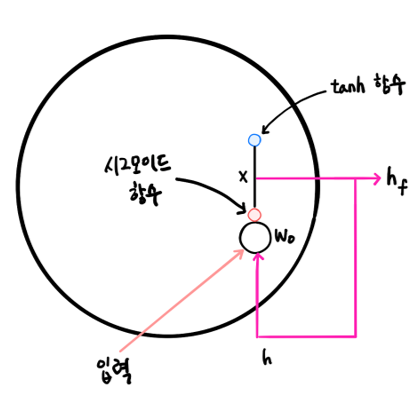

In [3]:
# 위 그림은 가중치 W_x와 W_h를 통틀어 W_o라고 표시함
# 파란색 원인 tanh 함수, 주황색 원은 시그모이드 함수임
# x는 곱셈을 나타내고 있음 -> 기본 순환층과 크게 다르지 않음

# tanh 함수를 통과하는 값은 ???
# LSTM에는 순환되는 상태가 2개이다 (은닉상태, 셀상태)
# 은닉상태와 달리 셀상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

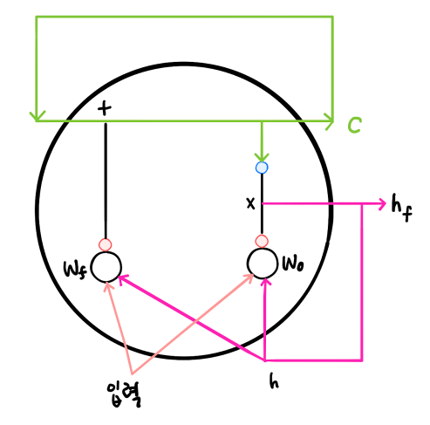

In [4]:
# 위 그림의 녹색은 순환되는 셀의 상태임
# 셀 상태를 은닉 상태 H와 구분하여 c로 표기함

# 셀상태를 계산하는 과정
# 먼저 입력과 은닉 상태를 또 가중치 W_f에 곱한 다음 시그모이드 함수를 통과함
# 그 다음 이전 타임스텝의 셀상태와 곱하여 새로운 셀의 상태를 만듬
# 이 셀 상태가 오른쪽에서 tanh함수를 통과하여 새로운 은닉 상태를 만드는데 기여함
# LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀 같다
# 중요한 것은 입력과 은닉상태에서 곱해지는 가중치 W_o와 W_f가 다름
#       -> 이 두 작은 셀은 각기 다른 기능을 위해 룬현됨

# 여기에 2개의 작은 셀이 더 추가되어 셀의 상태를 만드는데 기여함

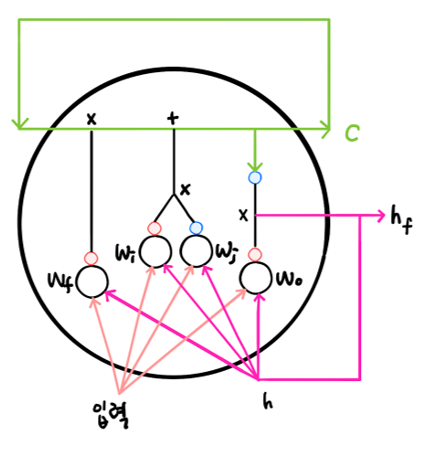

In [5]:
# 위 그림을 보면 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음 하나는 시그모이드 함수를 통과
#    다른 하나는 tanh 함수를 통과시킨다.
# 그 다음 두 결과를 곱한 후 이전 셀의 상태와 더함 (최종상태의 셀임)

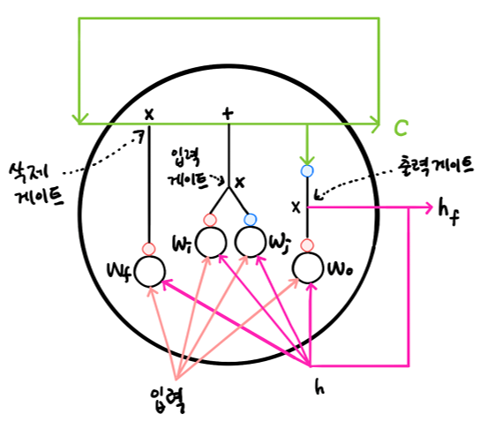

In [6]:
# 세군데 곱셈을 삭제 게이트, 입력 게이트, 출력게이트라고 부름
# 삭제 게이트는 셀의 상태에 있는 정보를 제거하는 역할
# 입력 게이트는 새로운 정보를 셀상태에 추가
# 출력 게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력
# 위의 처리는 케라스 LSTM클래스가 알아서 돌림

In [7]:
#LSTM 신경망 훈련하기
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드를 사용하고
# 센서플로 연산을 결정적으로 만듭니다
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)

train_input,val_input,train_target,val_target = train_test_split(train_input, train_target, test_size=0.2 ,random_state=42)

In [8]:
print(train_input.shape,val_input.shape,test_input.shape)

(20000,) (5000,) (25000,)


In [9]:
# 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)    # truncating='pre' 생략가능
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq[5]) # 여섯번째 토큰을 확인해보면 앞쪽에 0으로 패딩된걸 확인 할 수 있다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [10]:
# LSTM 셀을 사용한 순환층을 만들어 보자 ( 예전에 썻던 SimpleRNN클래스를 LSTM으로 변경만 하면 됨)
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500,16,input_shape=(100,)))
                                # num_words=500 어휘사전의 크기
                                    # 임배딩백터의 크기 16
                                        # maxlen=100

model.add(keras.layers.LSTM(8))             # 뉴련의 개수
model.add(keras.layers.Dense(1,activation='sigmoid'))   # 활성화 함수 sigmoid (2진 분류)

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200개 였다
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800임

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 컴파일 하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model1.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 배열 크기는 64개 , 에포크회수는 100으로 지정
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.7600 - loss: 0

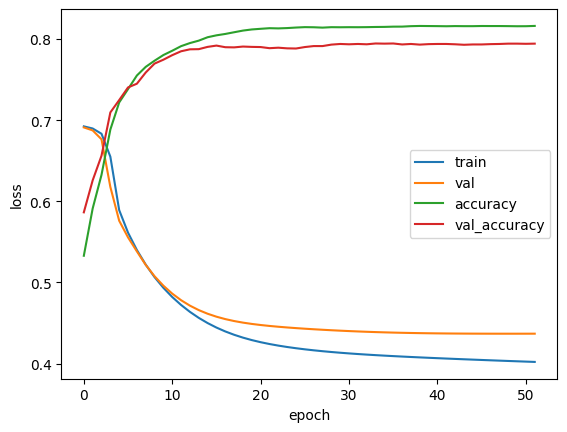

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val','accuracy','val_accuracy'])
plt.show()

In [13]:
# 결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것처럼 보임
# 하지만 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다 (드롭 아웃)

# 완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해서 드롭아웃을 적용하였었다
# 이를 통해 모델이 훈련세트에 너무 과대적합되는 것을 막았었음

# 순환층은 자체적으로 드롭아웃 기능을 제공한다
#   -> 드롭아웃 : 은닉층에 있는 뉴련의 출력을 핸덤하게 꺼서 과대적합을 방지한다

# SimpleRNN과 LSTM 클래스 모두 dropout매개변수와 recurrent_dropout 매개변수를 가지고 있음
# dropout은 셀의 입력에 드롭아웃을 적용, recurrent_dropout은 순환은닉 상태에 드롭아웃을 적용함
# recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못함 (모델의 훈련속도가 크게 느려짐)
# 그래서 이번에는 dropout만 적용 해볼 것

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500,16,input_shape=(100,)))
                                # num_words=500 어휘사전의 크기
                                    # 임배딩백터의 크기 16
                                        # maxlen=100

model2.add(keras.layers.LSTM(8,dropout=0.3))
                   # 뉴련의 개수
                                # 드롭아웃 매개값 0.3으로 지정(30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model2.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 배열 크기는 64개 , 에포크회수는 100으로 지정
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.6068 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6026 - loss: 0.6902 - val_accuracy: 0.6288 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6490 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6560 - val_loss: 0.6494
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7270 - val_loss: 0.5991
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7404 - val_loss: 0.5803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7326 - loss: 0

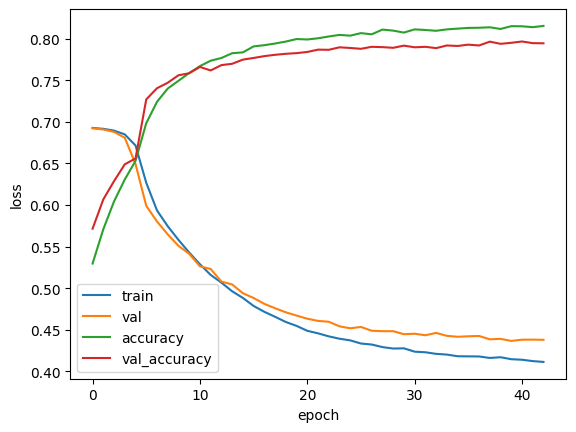

In [15]:
# 드롭아웃 전에는 53회 81.67%  손실 0.4013 검증 손실 0.4368
# 드롭아웃 후에는 43회 81.67%  손실 0.4109 검증 손실 0.4381
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val','accuracy','val_accuracy'])
plt.show() # 훈련 손실과 검증 손실 차이가 좁혀진 것을 확인 할 수 있음

In [16]:
# 2개의 층 연결하기

# 순환층을 연결할 때는 한가지 주의할 점이 있는데
# 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음층으로 전달됨

# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
# 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 함
# 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다 ( 처음에 본 그림 )

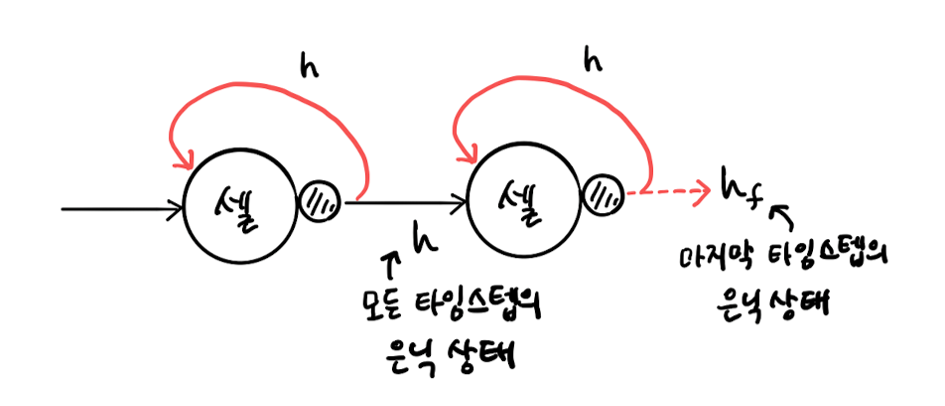

In [17]:
# 케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면
# 마지막을 제외한 다른 모든 순환층에서 return_sequences=True 로 지정함

model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500,16,input_shape=(100,)))
                                # num_words=500 어휘사전의 크기
                                    # 임배딩백터의 크기 16
                                        # maxlen=100

model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))  # 뉴련의 개수
model3.add(keras.layers.Dense(1,activation='sigmoid'))   # 활성화 함수 sigmoid (2진 분류)

model3.summary()
# 첫번째 LSTM층이 모든 타임스탭(100개)의 은닉상태를 출력하기 때문에
# 출력 크기가 (None, 100,8)로 표시 됨

# 이에 반해 두번째 LSTM층의 출력 크기는 마지막 타임 스텝의 은닉상태만 출력하기 때문에 (None,8)이다

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model3.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 배열 크기는 64개 , 에포크회수는 100으로 지정
history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.5235 - loss: 0.6927 - val_accuracy: 0.5964 - val_loss: 0.6907
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.5854 - loss: 0.6888 - val_accuracy: 0.6470 - val_loss: 0.6764
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.6495 - loss: 0.6604 - val_accuracy: 0.7104 - val_loss: 0.5774
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.7134 - loss: 0.5717 - val_accuracy: 0.7346 - val_loss: 0.5318
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.7405 - loss: 0.5346 - val_accuracy: 0.7580 - val_loss: 0.5051
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7571 - loss: 0.5090 - val_accuracy: 0.7616 - val_loss: 0.4972
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.7712 - loss: 0.4930 - val_accuracy: 0.7654 - val_loss: 0.4921
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.7732 - loss: 0

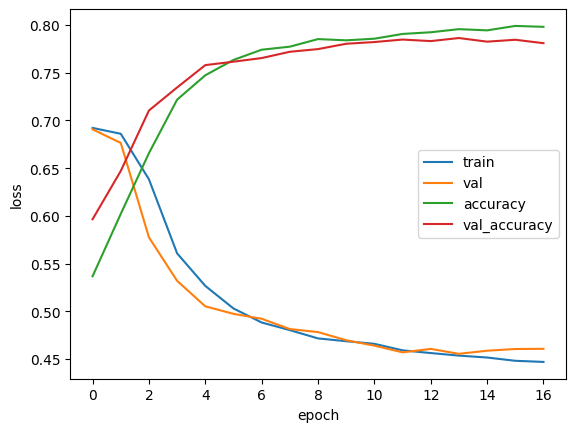

In [19]:
# 드롭아웃 전에는 53회 81.67%  손실 0.4013 검증 손실 0.4368
# 드롭아웃 후에는 43회 81.67%  손실 0.4109 검증 손실 0.4381
# 층을 추가하고 return_sequences=True로 진핼한 이루 에포크 25회 80.25% 손실 0.4408 검증 손실 0.4523

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val','accuracy','val_accuracy'])
plt.show()  # 과대적합을 제어하면서 손실을 최대한 낮춘 느낌이다.

In [20]:
# GRU(Gated Recurrent Units) 구조
# 뉴욕 대학교 조경현 교수가 발명한 셀로 유명함 (LSTM을 간소화 버젼으로 만듬)
# 셀상태를 개선하지 않고 은닉상태 하나만 포함하고 있다.

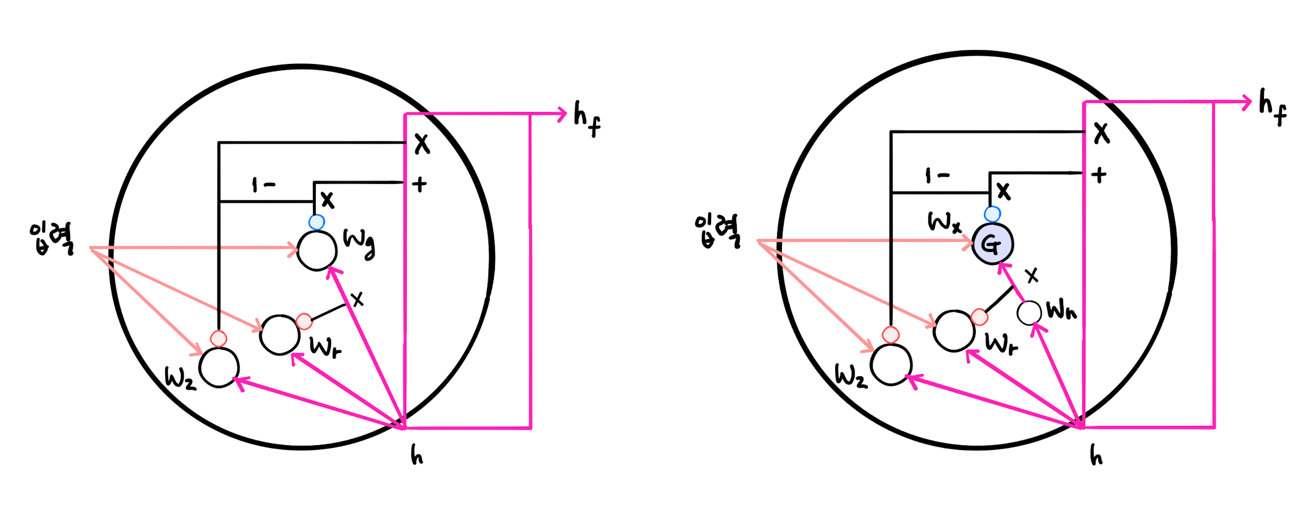

In [21]:
# GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다
# 2개는 시그모이드 활성화 함수를 이용하고 하나는 tanh 활성화 함수를 사용한다
# 여기에도 은닉상태와 곱해지는 가중치를 합쳐서 나타냈음

# 맨 윈쪽 W_z를 사용하는 셀의 출력이 은닉상태에서 바로 곱해져 삭제 게이트 역할을 수행한다
# 이와 똑같은 출력은 1에서 뺀 다음에 가장 오른쪽 W_g를 사용하는 셀의 출력에 곱한다
# 이는 입력되는 정보를 제어하는 역활을 수행한다
# 가운데 W_r을 사용하는 셀에서는 출력은 W_g 셀이 사용할 은닉 상태의 정보를 제어한다

# GRU셀은 LSTM보다 가중치가 적기 떄문에 개산량이 적지만 LSTM 못지 않은 좋은 성능을 보인다

In [22]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500,16,input_shape=(100,)))
                                # num_words=500 어휘사전의 크기
                                    # 임배딩백터의 크기 16
                                        # maxlen=100
model4.add(keras.layers.GRU(8)) # GRU로 변경함
model4.add(keras.layers.Dense(1,activation='sigmoid'))   # 활성화 함수 sigmoid (2진 분류)

model4.summary()
# 파라미터를 계산해보자  GRU셀에는 3개으 ㅣ작은 셀이 있다
# 작은 셀에는 입력과 은닉상태에 곱하는 가중치와 절편이 있다
# 입력에 곱하는 가중치는 15*8=128개 이고 은닉 상태에 곱하는 가중치는 8*8 = 64 이다
# 절편은 뉴런마다 하나씩이므로 8개임
# 모두 더하면 128+64+8 = 200 이런 작은 셀이 3개 이므로 600개가 됨

# 624개가 된 이유는 3개의 절편마다 8개의 뉴런이 존재하기 때문에 3*8 = 24 까지 더해짐
# 600+(3*8) = 624
# 텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서 이다 (LSTM 개선점)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model1.keras',save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 배열 크기는 64개 , 에포크회수는 100으로 지정
history = model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5206 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.5616 - val_loss: 0.6921
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.5831 - loss: 0.6917 - val_accuracy: 0.5714 - val_loss: 0.6911
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.5901 - loss: 0.6903 - val_accuracy: 0.5844 - val_loss: 0.6893
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.6033 - loss: 0.6882 - val_accuracy: 0.5938 - val_loss: 0.6866
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6136 - loss: 0.6849 - val_accuracy: 0.6036 - val_loss: 0.6822
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.6197 - loss: 0.6796 - val_accuracy: 0.6120 - val_loss: 0.6752
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6300 - loss: 0

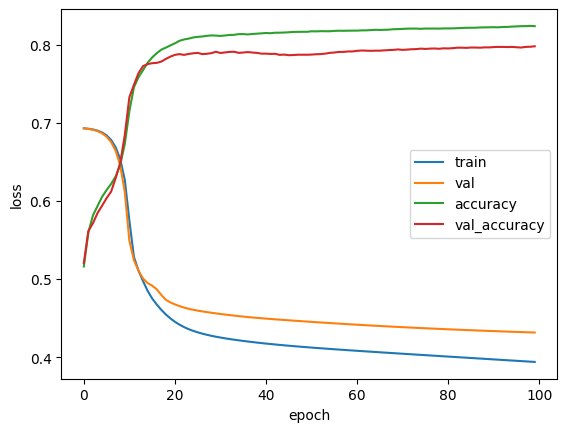

In [24]:
# LSTM : 드롭아웃 전에는 53회 81.67%  손실 0.4013 검증 손실 0.4368
# LSTM : 드롭아웃 후에는 43회 81.67%  손실 0.4109 검증 손실 0.4381
# LSTM : 층을 추가하고 return_sequences=True로 진행한 이루 에포크 25회 80.25% 손실 0.4408 검증 손실 0.4523
# GRU : 드롭아웃 하기전
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val','accuracy','val_accuracy'])
plt.show()

In [25]:
test_seq = pad_sequences(test_input,maxlen=100)

lstm_model1 = keras.models.load_model('best-lstm-model1.keras')

lstm_model1.evaluate(test_seq,test_target)
# 드롭아웃 전 LSTM

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8005 - loss: 0.4325


[0.4330812990665436, 0.7997199892997742]

In [26]:
lstm_model1 = keras.models.load_model('best-lstm-model2.keras')

lstm_model1.evaluate(test_seq,test_target)
# 드롭아웃 후 LSTM

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8024 - loss: 0.4356


[0.43517428636550903, 0.8009999990463257]

In [27]:
lstm_model1 = keras.models.load_model('best-lstm-model3.keras')

lstm_model1.evaluate(test_seq,test_target)
#  LSTM 층을 추가하고 return_sequences=True

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7877 - loss: 0.4545


[0.4543180465698242, 0.7878400087356567]

In [28]:
lstm_model1 = keras.models.load_model('best-gru-model1.keras')

lstm_model1.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8039 - loss: 0.4297


[0.4291016459465027, 0.8022000193595886]